In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab/INvideos.csv")

In [2]:
import matplotlib.pyplot as plt

In [3]:
#checking data 
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [4]:
#checking if there is null values or not
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [5]:
#removing unneccery column
data.drop(['video_id','description'],axis=1,inplace=True)

In [6]:
data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [7]:
#processing date columns
def dat(time):
  val=time.split('T')
  return val[0]
data['publish_time']=data['publish_time'].apply(dat)

In [8]:
data['publish_time']=data['publish_time'].str.replace('-','/')


In [9]:
data['trending_date']=data['trending_date'].str.replace('.','/')

In [10]:
def se(date):
  da=date.split('/')
  return '20'+da[0]+'/'+da[2]+'/'+da[1]
data['trending_date']=data['trending_date'].apply(se)

In [11]:
data['trending_date']

0        2017/11/14
1        2017/11/14
2        2017/11/14
3        2017/11/14
4        2017/11/14
            ...    
37347    2018/06/14
37348    2018/06/14
37349    2018/06/14
37350    2018/06/14
37351    2018/06/14
Name: trending_date, Length: 37352, dtype: object

In [12]:
#converting date to pandas dataframe
data["trending_date"]= pd.to_datetime(data["trending_date"])
data['publish_time']=pd.to_datetime(data['publish_time'])
#finiding how much day generally takes for trending
data['public_to_trend']=data["trending_date"].dt.day - data['publish_time'].dt.day 

In [13]:
main=data['public_to_trend'].value_counts()
main=pd.DataFrame(main)


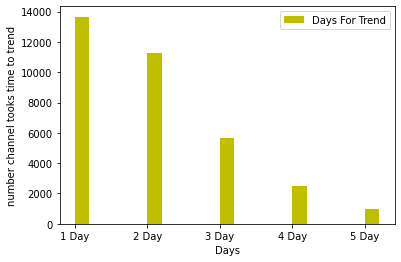

In [14]:
#ploting day with with number of videos for trending
plt.bar(['1 Day','2 Day','3 Day','4 Day','5 Day'],main["public_to_trend"][:5] ,width=0.2,align="edge",color="y",label="Days For Trend")
plt.xlabel("Days")
plt.ylabel("number channel tooks time to trend")
plt.legend()

In [15]:
top_viewes=data.nlargest(10,'views')
top_viewes

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,public_to_trend
5408,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,6
5119,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811216,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,5
4936,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656672,1353650,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,4
4477,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-22
4236,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584674,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-23
4013,2017-12-05,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-24
3823,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513102,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-25
4743,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251815,1127805,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,3
3639,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-26
3456,2017-12-02,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331352,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,-27


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

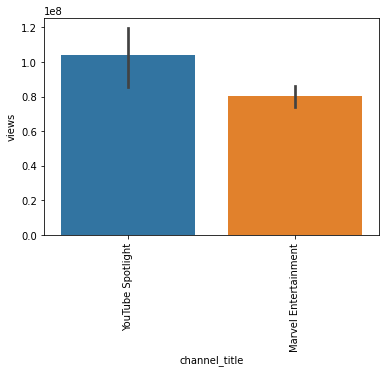

In [16]:
#ploting top 2 channel which has most viewed on youtube
import seaborn as sns
sns.barplot(x="channel_title",y="views",data=top_viewes)
plt.xticks(rotation=90)

In [17]:
#checking available youtube category id
data['category_id'].unique()

array([ 1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29,  2, 15, 20, 30])

In [18]:
category=data['category_id'].value_counts()
category

24    16712
25     5241
10     3858
23     3429
22     2624
1      1658
27     1227
26      845
17      731
28      552
43      205
29      105
2        72
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64

In [19]:
#top 5 youtube category id
category=category[:5]


In [20]:
val=category.values
list(val)

[16712, 5241, 3858, 3429, 2624]

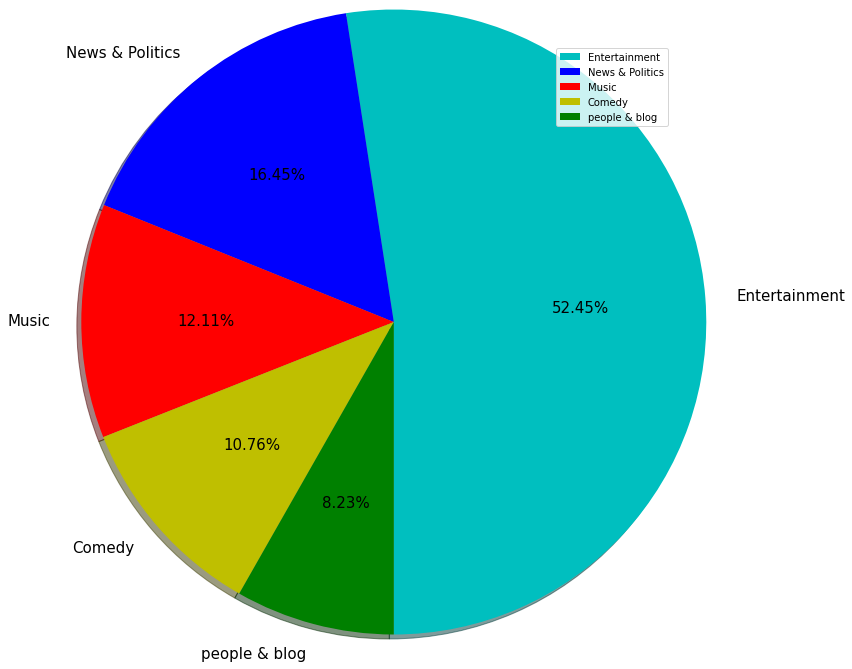

In [21]:
#ploting top 5 categories on youtube
plt.figure(figsize=(10,12))
explode = [0,0,0,0,0] # To slice the perticuler section
colors = ["c", 'b','r','y','g'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
 
plt.pie(val, # Values
        labels = ['Entertainment','News & Politics','Music','Comedy','people & blog'], # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 
plt.legend(loc=0) # To show legend
plt.show() # To show pie chart only

In [22]:
#most viewed channel category 
#24 cAtegory is entertainment
MVC=data[data['views']==data['views'].max()]
print(MVC['category_id']) 

5408    24
Name: category_id, dtype: int64
